In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import astropy.units as u

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams.update({"text.usetex": True})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
fname = "./47_tuc_nobin/NGC0104_sampler.hdf"

In [4]:
mcmcviz_nobin = viz.MCMCVisualizer(fname, obs)
m = mcmcviz_nobin.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)

/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)

/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon]

/home/peter/research/GCfit/fitter/probabilities/mass.py:235: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the co

In [5]:
civiz_nobin = mcmcviz_nobin.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.0)

/home/peter/research/GCfit/fitter/visualize/models.py:2169: RuntimeWarning: divide by zero encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot

/home/peter/research/GCfit/fitter/visualize/models.py:2169: RuntimeWarning: invalid value encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



In [6]:
fname = "./47_tuc_highbin/NGC0104_sampler.hdf"

In [7]:
mcmcviz_highbin = viz.MCMCVisualizer(fname, obs)
m = mcmcviz_highbin.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

/home/peter/research/GCfit/fitter/visualize/models.py:1671: RuntimeWarning: overflow encountered in true_divide
  self.frac_M_MS = mass_MS / mass_tot

/home/peter/research/GCfit/fitter/visualize/models.py:1672: RuntimeWarning: overflow encountered in true_divide
  self.frac_M_rem = mass_rem / mass_tot



In [8]:
civiz_highbin = mcmcviz_highbin.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.1)

/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon]

/home/peter/research/GCfit/fitter/probabilities/mass.py:235: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and

In [9]:
med = civiz_highbin.cum_M_Bin.shape[1]//2

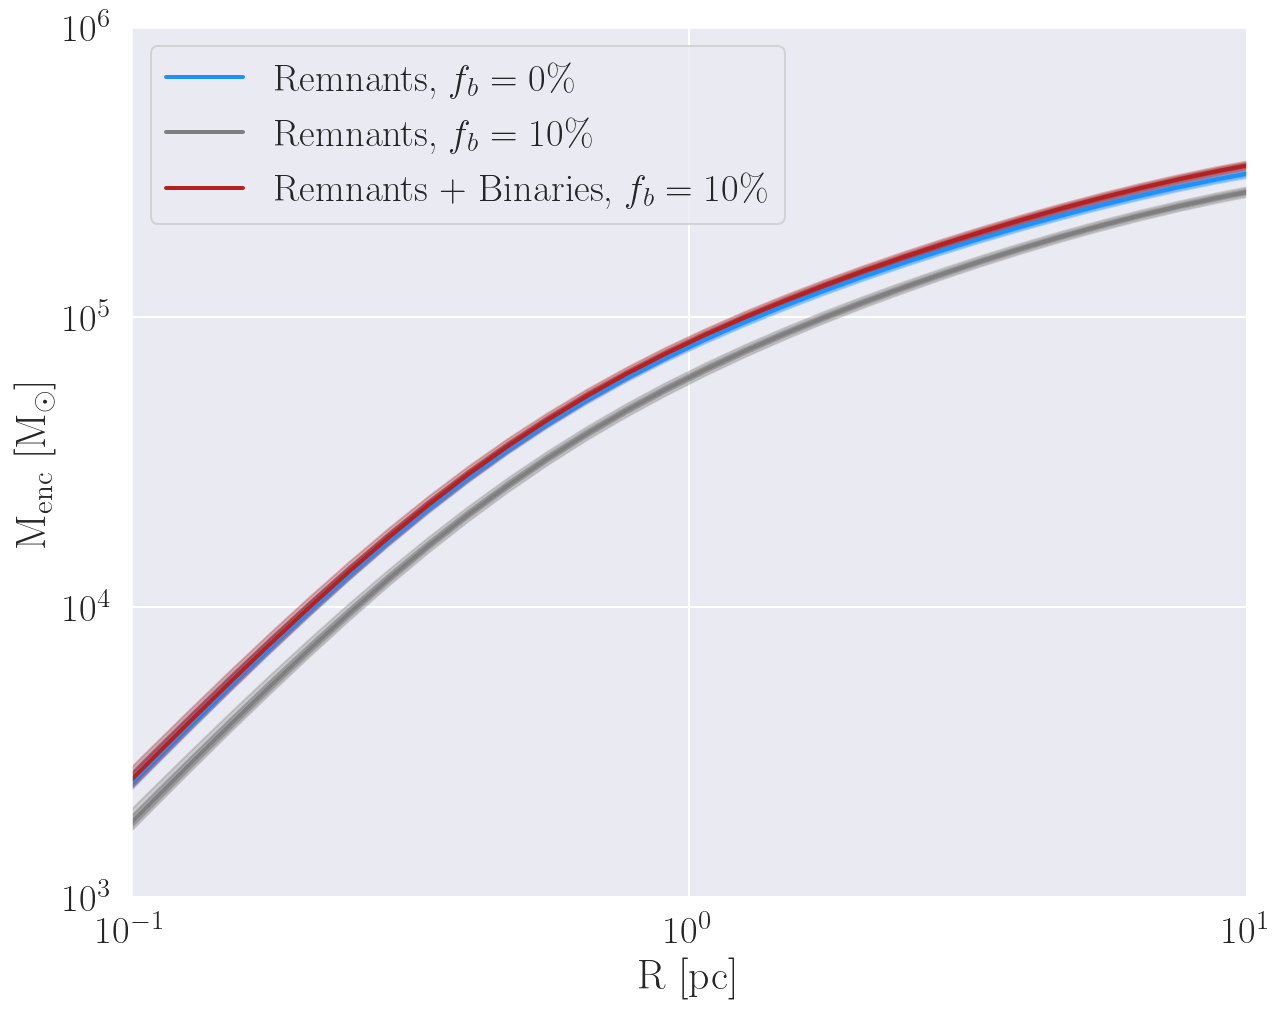

In [10]:
fig = plt.figure(figsize=(10, 8))

ax = plt.gca()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'$\mathrm{M_{{enc}}}$ $[\mathrm{M}_\odot]$')
ax.set_xlabel(r'R [pc]')

plt.xlim(1e-1, 1e1)
plt.ylim(1e3, 1e6)
     

remnants = civiz_nobin.cum_M_BH[0] + civiz_nobin.cum_M_NS[0] + civiz_nobin.cum_M_WD[0]
r = civiz_nobin.r.value
plt.plot(r,remnants[med].value,label="Remnants, $f_b=0\%$",color="dodgerblue",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="dodgerblue",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="dodgerblue",alpha=0.3)

remnants = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0]
r = civiz_highbin.r.value
plt.plot(r,remnants[med].value,label="Remnants, $f_b=10\%$",color="tab:gray",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="tab:gray",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="tab:gray",alpha=0.3)


remnants = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0]
remnants += civiz_highbin.cum_M_Bin[0]
r = civiz_highbin.r.value
plt.plot(r,remnants[med].value,label="Remnants $+$ Binaries, $f_b=10\%$",color="firebrick",lw=2)        
plt.fill_between(r,remnants[med+1].value,remnants[med-1].value,color="firebrick",alpha=0.5)
plt.fill_between(r,remnants[med+2].value,remnants[med-2].value,color="firebrick",alpha=0.3)


plt.legend()


fig.savefig("mass_enc_comp.png", bbox_inches="tight", dpi=300)


plt.show()

In [11]:
remnants

<Quantity [[0.00000000e+00, 2.92208479e-05, 4.04889284e-05,
            5.61021817e-05, 7.77361838e-05, 1.07712643e-04,
            1.49248558e-04, 2.06801461e-04, 2.86547787e-04,
            3.97045714e-04, 5.50153602e-04, 7.62302606e-04,
            1.05626002e-03, 1.46357261e-03, 2.02795211e-03,
            2.80996628e-03, 3.89353882e-03, 5.39495586e-03,
            7.47534543e-03, 1.03579692e-02, 1.43521822e-02,
            1.98866319e-02, 2.75552589e-02, 3.81810363e-02,
            5.29042882e-02, 7.33050633e-02, 1.01572698e-01,
            1.40740765e-01, 1.95012611e-01, 2.70212428e-01,
            3.74410239e-01, 5.18787861e-01, 7.18838736e-01,
            9.96030325e-01, 1.38010732e+00, 1.91228259e+00,
            2.64965784e+00, 3.67134732e+00, 5.08696017e+00,
            7.04834789e+00, 9.76587128e+00, 1.35309184e+01,
            1.87470592e+01, 2.59731296e+01, 3.59827624e+01,
            4.98465700e+01, 6.90453846e+01, 9.56260206e+01,
            1.32415783e+02, 1.83316082e+

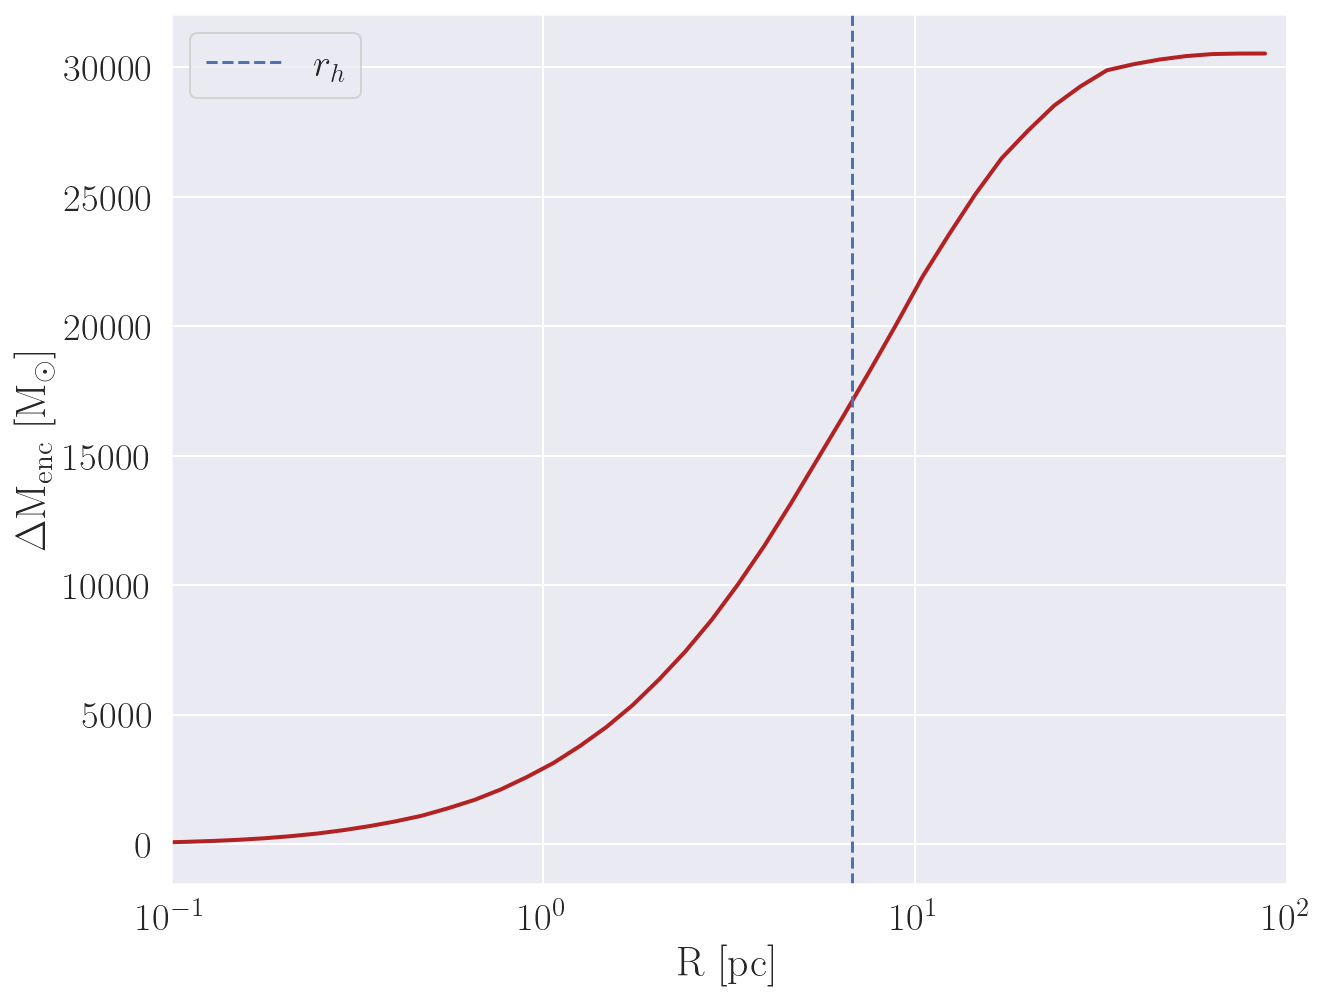

In [12]:
fig = plt.figure(figsize=(10, 8))

ax = plt.gca()
ax.set_xscale("log")
ax.set_ylabel(r'$\Delta \mathrm{M_{{enc}}}$ $[\mathrm{M}_\odot]$')
ax.set_xlabel(r'R [pc]')

plt.xlim(1e-1, 1e2)
# plt.ylim(1e3, 1e6)
     

remnants_nobin = civiz_nobin.cum_M_BH[0] + civiz_nobin.cum_M_NS[0] + civiz_nobin.cum_M_WD[0]
   


remnants_highbin = civiz_highbin.cum_M_BH[0] + civiz_highbin.cum_M_NS[0] + civiz_highbin.cum_M_WD[0] + civiz_highbin.cum_M_Bin[0]



r = civiz_highbin.r.value

resid = remnants_highbin[med].value - remnants_nobin[med].value
plt.plot(r, resid, label="", color="firebrick", lw=2)        


plt.axvline(6.779, ls="--", label=r"$r_h$")
# plt.axvspan(6.779-0.060, 6.779+0.064,color="orange")
plt.legend()


fig.savefig("mass_enc_residuals.png", bbox_inches="tight", dpi=300)


plt.show()

In [13]:
mcmcviz_highbin.print_summary()

./47_tuc_highbin/NGC0104_sampler.hdf - Run Results
   W0 = 6.383 (+0.111, -0.099)
    M = 0.894 (+0.010, -0.009)
   rh = 6.779 (+0.064, -0.060)
   ra = 1.475 (+0.061, -0.055)
    g = 1.322 (+0.065, -0.084)
delta = 0.411 (+0.015, -0.016)
   s2 = 0.010 (+0.023, -0.006)
    F = 3.203 (+0.219, -0.140)
   a1 = 0.449 (+0.024, -0.022)
   a2 = 1.524 (+0.047, -0.052)
   a3 = 2.452 (+0.050, -0.056)
BHret = 0.168 (+0.175, -0.115)
    d = 4.429 (+0.022, -0.020)

Run Metadata
Iterations = 2500
Dimensions = (1024, 13)
Has statistics = True
Has metadata = True
Fixed parameters:
    None
Excluded components:
    (0) b'*Rhoads*'


In [14]:
nobin_remnant_mass = civiz_nobin.cum_M_BH[0][med][-1] + civiz_nobin.cum_M_NS[0][med][-1] + civiz_nobin.cum_M_WD[0][med][-1] + civiz_nobin.cum_M_BH[0][med][-1]
nobin_remnant_mass

<Quantity 401821.48150394 solMass>

In [15]:
highbin_remnant_plis_binaries_mass = civiz_highbin.cum_M_BH[0][med][-1] + civiz_highbin.cum_M_NS[0][med][-1] + civiz_highbin.cum_M_WD[0][med][-1] + civiz_highbin.cum_M_Bin[0][med][-1]
highbin_remnant_plis_binaries_mass

<Quantity 432223.8109179 solMass>

In [16]:
highbin_remnant_plis_binaries_mass - nobin_remnant_mass

<Quantity 30402.32941396 solMass>